In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



pd.set_option("display.max_columns", None)
passing_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2024-2025/player_season/passing.csv', usecols=["team", "player", "player_id", "att", "cmp", "prgp", "90s", "cmp_cmp", "1_3", "kp", "prgdist"])
poss_df = pd.read_csv('../data/processed/fbref/ENG-Premier League/2024-2025/player_season/possession.csv', usecols=["player_id", "touches", "def_3rd", "def_pen", "att", "succ", "carries", "prgc", "prgdist", "dis", "rec", "prgr"])

passing_df = passing_df.rename(columns={"cmp_cmp": "cmp_pct"})
poss_df = poss_df.rename(columns={"att": "takeons", "prgdist": "prgcdist", "dis": "dispossessed"})


df = passing_df

df = df.merge(
    poss_df, 
    on=["player_id"],
    how="left")


In [89]:
#Kobbie Mainoo, Baleba, Adam Wharton rows
players = ["Kobbie Mainoo", "Carlos Baleba", "Adam Wharton", "Bruno Fernandes", "Casemiro", "Manuel Ugarte Ribeiro", "Amadou Onana"]
players_df = df.loc[df["player"].isin(players)].copy()


In [90]:
#passes per 90
ppg = players_df["cmp"] / players_df["90s"]
distpg = players_df["prgdist"] / players_df["90s"]
prg = players_df["prgp"] / players_df["90s"]
touches = players_df["touches"] / players_df["90s"]
def_pen = players_df["def_pen"] / players_df["90s"]
carries = players_df["carries"] / players_df["90s"]
def_3rd = players_df["def_3rd"] / players_df["90s"]


players_df["passes_p90"] = round(ppg, 2)
players_df["prg_distp90"] = round(distpg, 2)
players_df["prg_passes90"] = round(prg, 2)
players_df["touches_p90"] = round(touches, 2)
players_df["def_pen_p90"] = round(def_pen, 2)
players_df["carries_p90"] = round(carries, 2)
players_df["def_3rd_p90"] = round(def_3rd, 2)




C:\Users\oukan\AppData\Local\Temp\ipykernel_23592\1626019575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=passing, x="player", y="passes_p90", ax=ax, palette="viridis")


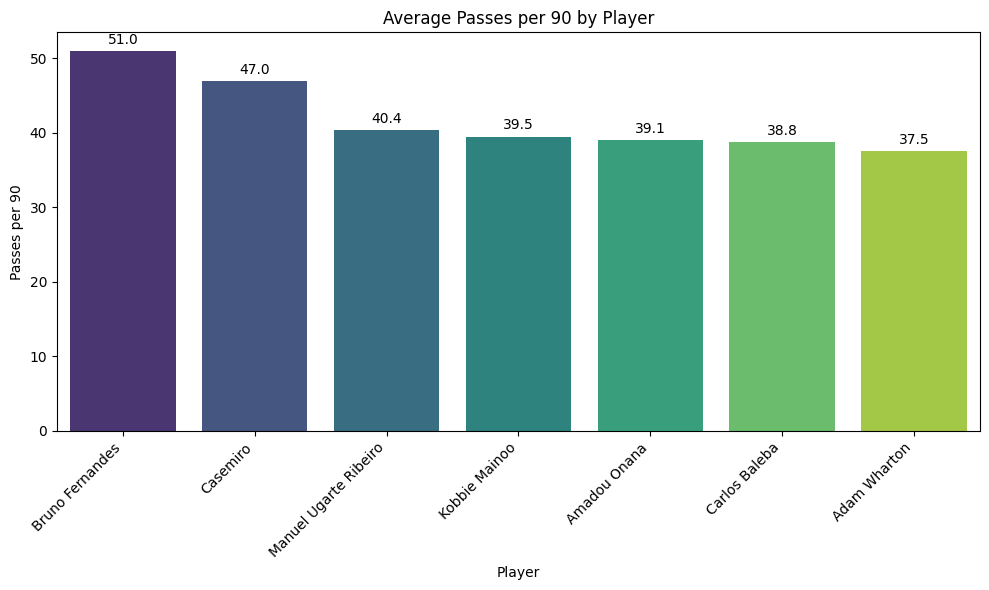

In [91]:
passing = (players_df.groupby("player", as_index=False)["passes_p90"]
           .mean()
           .sort_values("passes_p90", ascending=False))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=passing, x="player", y="passes_p90", ax=ax, palette="viridis")
ax.set_title("Average Passes per 90 by Player")
ax.set_xlabel("Player")
ax.set_ylabel("Passes per 90")
plt.xticks(rotation=45, ha="right")

# ---- add labels on top of each bar ----
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1f}",
                (p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha="center", va="bottom")

plt.tight_layout()
#plt.show()

C:\Users\oukan\AppData\Local\Temp\ipykernel_23592\2302270432.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=passing, x="player", y="touches_p90", ax=ax, palette="viridis")


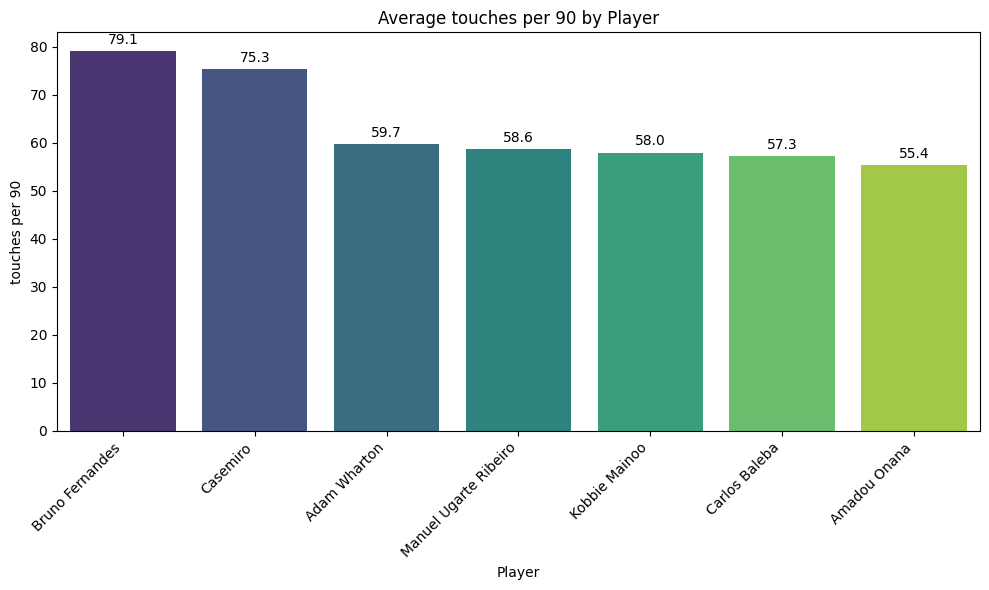

In [92]:
passing = (players_df.groupby("player", as_index=False)["touches_p90"]
           .mean()
           .sort_values("touches_p90", ascending=False))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=passing, x="player", y="touches_p90", ax=ax, palette="viridis")
ax.set_title("Average touches per 90 by Player")
ax.set_xlabel("Player")
ax.set_ylabel("touches per 90")
plt.xticks(rotation=45, ha="right")

# ---- add labels on top of each bar ----
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.1f}",
                (p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [93]:
exp_df = pd.read_csv("../data/models/expected_points/v1/expected_points.csv", usecols=["player_id","player","gw_orig", "date_played", "exp_goals","exp_assists", "xp_goals", "xp_assists", "exp_points_total"])
pts_df = pd.read_csv("../data/processed/fpl/2024-2025/gws/merged_gws.csv", usecols=["player_id", "xP", "total_points", "expected_goals", "round", "game_date"])
pts_df = pts_df.rename(columns={"round": "gw_orig"})
exp_df =exp_df.merge(
    pts_df,
    on=["player_id", "gw_orig"],
    how="left")

exp_players = ["Rasmus Højlund"]
Exp_players_df = exp_df.loc[exp_df["player"].isin(exp_players)].copy()

display(Exp_players_df)

,gw_orig,date_played,player_id,player,exp_goals,exp_assists,xp_goals,xp_assists,exp_points_total,xP,expected_goals,total_points,game_date
217,29,2025-03-16,1f1931d3,Rasmus Højlund,0.294673,0.013832,1.178690,0.041497,2.539043,3.0,0.24,7.0,2025-03-16
286,30,2025-04-01,1f1931d3,Rasmus Højlund,0.139821,0.000000,0.559284,0.000000,2.227942,2.5,0.03,1.0,2025-04-01
762,31,2025-04-06,1f1931d3,Rasmus Højlund,0.002434,0.000000,0.009737,0.000000,1.608532,2.8,0.00,2.0,2025-04-06
1060,32,2025-04-13,1f1931d3,Rasmus Højlund,0.030976,0.017170,0.123905,0.051511,1.991279,0.0,0.31,1.0,2025-04-13
1479,33,2025-04-20,1f1931d3,Rasmus Højlund,0.043917,0.000000,0.175670,0.000000,1.683713,1.5,0.07,2.0,2025-04-20
1817,34,2025-04-27,1f1931d3,Rasmus Højlund,0.324744,0.000000,1.298975,0.000000,2.897770,0.0,0.48,9.0,2025-04-27
2401,36,2025-05-11,1f1931d3,Rasmus Højlund,0.374757,0.162560,1.499028,0.487681,3.802572,3.2,1.31,2.0,2025-05-11
2472,37,2025-05-16,1f1931d3,Rasmus Højlund,0.013992,0.079478,0.055967,0.238435,2.223122,3.2,0.00,2.0,2025-05-16
2973,38,2025-05-25,1f1931d3,Rasmus Højlund,0.304400,0.143332,1.217599,0.429995,3.552364,1.5,0.12,2.0,2025-05-25
